In [40]:
# Import Dependencies

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [41]:
# Import Data

red_wine = pd.read_csv('red_wine_data_index.csv')
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,index
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,163.38
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,177.48
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,177.90
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,221.30
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,163.38


In [42]:
# Assign X (data) and y (target)

X = red_wine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']].values
y = red_wine["quality"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1599, 11) (1599, 1)


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
# Create a StandardScaler model and fit it to the training data

X_scaler = StandardScaler().fit(X_train.reshape(-1, 1))

In [46]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# K Nearest Neighbors

/Users/Cyrus/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


k: 1, Train/Test Score: 1.000/0.593
k: 2, Train/Test Score: 0.782/0.485
k: 3, Train/Test Score: 0.736/0.507
k: 4, Train/Test Score: 0.681/0.520
k: 5, Train/Test Score: 0.641/0.500
k: 6, Train/Test Score: 0.635/0.510
k: 7, Train/Test Score: 0.606/0.507
k: 8, Train/Test Score: 0.607/0.500
k: 9, Train/Test Score: 0.596/0.495
k: 10, Train/Test Score: 0.592/0.482
k: 11, Train/Test Score: 0.590/0.482
k: 12, Train/Test Score: 0.579/0.492
k: 13, Train/Test Score: 0.590/0.502
k: 14, Train/Test Score: 0.576/0.507
k: 15, Train/Test Score: 0.571/0.492
k: 16, Train/Test Score: 0.583/0.515
k: 17, Train/Test Score: 0.585/0.502
k: 18, Train/Test Score: 0.588/0.507
k: 19, Train/Test Score: 0.580/0.500
k: 20, Train/Test Score: 0.573/0.510
k: 21, Train/Test Score: 0.571/0.507
k: 22, Train/Test Score: 0.571/0.505
k: 23, Train/Test Score: 0.575/0.505
k: 24, Train/Test Score: 0.575/0.497
k: 25, Train/Test Score: 0.585/0.502
k: 26, Train/Test Score: 0.574/0.495
k: 27, Train/Test Score: 0.584/0.507
k: 28, Tra

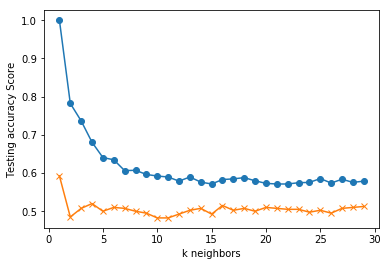

In [47]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 30, 1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 30, 1), train_scores, marker='o')
plt.plot(range(1, 30, 1), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [48]:
# Note that k: 13 provides the best accuracy where the classifier starts to stablize
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=9 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.502


/Users/Cyrus/anaconda/envs/PythonData/lib/python3.6/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [52]:
new_red_wine_data = [[8.6,0.7,0.56,11.0,0.076,11,13,0.9973,3.51,0.86,12.0]]
predicted_class = knn.predict(new_red_wine_data)
print(predicted_class)

[7]
